#Exercícios de Física Computacional
##Folha 4
2. Considere a equação x = e^(1-x^2).

(a) Resolva-a graficamente.

R: Desenhar graficamente as duas equações: x e e^(1-x^2).

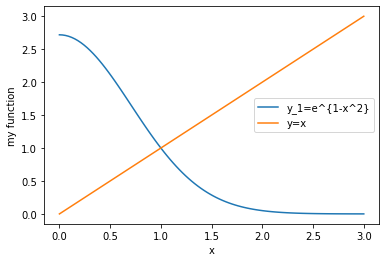

In [ ]:
import pylab
import numpy

x=numpy.linspace(0,3,100)
y1=numpy.exp(1-x**2)
y2=x
pylab.plot(x, y1, label="y_1=e^{1-x^2}")
pylab.plot(x, y2, label="y=x")
pylab.xlabel("x")
pylab.ylabel("my function")
pylab.legend()

pylab.show()


(b) Resolva-a iterativamente (método do relaxamento), tentando incialmente x = 1/2, inserindo este valor no lado direito da equação,
calculando um novo x
′ = e
1−(1/2)2
, usando este novo valor para calcular x
′′ e assim sucessivamente. O método converge?

R: Oscila entre dois valores, logo o método não converge.

In [ ]:
import pylab
import numpy

x=0.5
for i in range(20):
  x=numpy.exp(1-x**2)
  print(x)

2.117000016612675
0.030755419069985038
2.715711832754083
0.0017034651847384463
2.71827394057758
0.001679913095081425
2.7182741571849562
0.0016799111168229455
2.7182741572030236
0.0016799111166579386
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221
2.7182741572030253
0.0016799111166579221


(c) Obtenha uma equação equivalente, tomando o logarítmo de ambos
os lados da equação e repita o método anterior. O método agora
converge?


In [ ]:
from numpy import log, sqrt, exp
def f(x):
  return sqrt(1-log(x))

F=vectorize(f)

x=0.5
for i in range(10):
  x=F(x)
  print(x)

x=0.5
while abs(x-F(x))>le-20
 x=F(x)

 print()
 print("solution =", x)
 print("check:",x,"=",exp(1-x*x))

3. Considere o seguinte circuito:

(a) Assumindo que as diferenças de potencial nos pontos 1, 2, and 3 são
V1 = x1e
iωt
, V2 = x2e
iωt, e V3 = x3e
iωt; e aplicando a lei de Kirchhoff
em cada um dos 3 pontos, verifique que as constantes x1, x2, e x3
satisfazem as seguintes equações:


In [ ]:
import numpy as np
from numpy.linalg import solve
from cmath import polar, pi
import matplotlib.pyplot as plt

def sistema(R1,R2,R3,R4,R5,R6,C1,C2,x,w):
  b=np.zeros(3)
  m=np.array([[(1/R1)+(1/R4)+1j*w*C1,-1j*w*C1,0],
              [-1j*w*C1,(1/R2)+(1/R5)+1j*w*C1+1j*w*C2,-1j*w*C2],
              [0,-1j*w*C2,(1/R3)+(1/R6)+1j*w*C2]])
  b[0]=x/R1
  b[1]=x/R2
  b[2]=x/R3
  print(m)
  return solve(m,b)

(b) Escreva um programa para obter x1, x2, e x3 nas seguintes condições:
R1 = R3 = R5 = 1 kΩ,
R2 = R4 = R6 = 2 kΩ,
C1 = 1 µF, C2 = 0.5 µF,
x+ = 3 V, ω = 1000 s−1
.

In [ ]:
R1=R3=R5=1e3
R2=R4=R6=2e3
C1=1e-6
C2=0.5e-6
x=3
w=1000
r=sistema(R1,R2,R3,R4,R5,R6,C1,C2,x,w)

for n in range(1,4):
  a,p=polar(r[n-1])
  print("V"+str(n),"\namplitude = ",a,"\nphase = ",p*180/pi)

[[0.0015+0.001j  0.    -0.001j  0.    +0.j    ]
 [0.    -0.001j  0.0015+0.0015j 0.    -0.0005j]
 [0.    +0.j     0.    -0.0005j 0.0015+0.0005j]]
V1 
amplitude =  1.7014390658777336 
phase =  -5.469094970111936
V2 
amplitude =  1.4806053465364064 
phase =  11.583418604687067
V3 
amplitude =  1.8607693200562134 
phase =  -4.164672651865924


5. Considere o seguinte circuito:

Todas as resistências têm a mesma resistência, R. A fonte de tensão introduz uma diferença de potencial de V+ = 5V e pretende-se determinar
V1 . . . VN nos pontos internos do circuito.

(a) Usando as leis de Ohm e de Kirchhoff, demonstre que:

3V1 − V2 − V3 = V+,

−V1 + 4V2 − V3 − V4 = V+,

.
.
.

−Vi−2 − Vi−1 + 4Vi − Vi+1 − Vi+2 = 0,

.
.
.

−VN−3 − VN−2 + 4VN−1 − VN = 0,

−VN−2 − VN−1 + 3VN = 0.

Exprima estas equações na forma matricial, Av = w.

In [ ]:
from numpy import copy
def banded(Aa,va,up,down):
    A = copy(Aa)
    v = copy(va)
    N = len(v)
    for m in range(N):
        div = A[up,m]
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]
    return v

def matris(N,Vplus):
  b=np.zeros(N)
  b[0:2]=Vplus
  m=np.zeros((N,N))
  m[0][0:3]=[3,-1,-1]
  m[1][0:4]=[-1,4,-1,-1]
  j=2
  for i in range(2,N-2):
    m[j][i]=4 
    m[j][(i-2):i]=m[j][(i+1):(i+3)]=-1
    j+=1
  m[j][(N-4):N]=[-1,-1,4,-1]
  m[j+1][(N-3):N]=[-1,-1,3]
  return (m,b)

def circuito(N,Vplus):
  m=np.zeros((5,N))
  m[0][0:]=m[1][0:]=m[3][0:]=m[4][0:]=-1
  m[2][1:(N-1)]=4
  m[2][0]=m[2][N-1]=3
  b=np.zeros(N)
  b[0:2]=Vplus
  return banded(m,b,2,2)

In [ ]:
print(matris(6,5))

(array([[ 3., -1., -1.,  0.,  0.,  0.],
       [-1.,  4., -1., -1.,  0.,  0.],
       [-1., -1.,  4., -1., -1.,  0.],
       [ 0., -1., -1.,  4., -1., -1.],
       [ 0.,  0., -1., -1.,  4., -1.],
       [ 0.,  0.,  0., -1., -1.,  3.]]), array([5., 5., 0., 0., 0., 0.]))


[3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ]


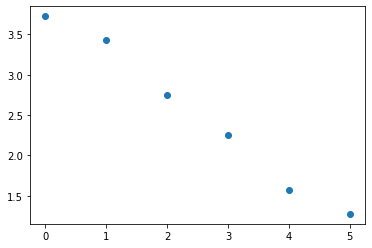

In [ ]:
import matplotlib.pyplot as plt
print(circuito(6,5))
plt.plot(circuito(6,5),'o')

[4.99888228e+00 4.99861842e+00 4.99802841e+00 ... 1.97158611e-03
 1.38158071e-03 1.11772227e-03]


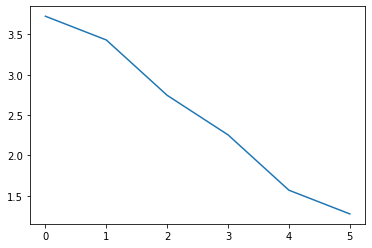

In [ ]:
import matplotlib.pyplot as plt
print(circuito(10000,5))
plt.plot(circuito(6,5))

4.Considere um sistema de $N$ massas idênticas, ligadas por molas horizontais, também idênticas. Ignore a gravidade e o atrito.
Seja $\xi_i$ o deslocamento da massa $i$ em relação à sua posição de equilíbrio.
As equações de movimento para o sistema são dadas pela segunda lei de
Newton:

(1)  $m\frac{d^{2}\xi_{i}}{dt^{2}}=k(\xi_{i+1}-\xi_{i})+k(\xi_{i-1}-\xi_{i})+F_{i}$,


sendo $m$ a massa e $k$ a (mesma) constante de cada uma das molas e $F_i$
uma força externa aplicada na massa $i$. As únicas excepções à equação
anterior são para as massas das extremidades, que são descritas por:

(2) $m\frac{d^{2}\xi_{i}}{dt^{2}}=k(\xi_{2}-\xi_{1})+F_{1}$,

(3) $m\frac{d^{2}\xi_{N}}{dt^{2}}=k(\xi_{N-1}-\xi_{N})+F_{N}$

Considere agora que aplicamos uma única força ao sistema e que esta
é aplicada à primeira massa e varia com o tempo da seguinte forma:
$F_1 = Ce^{iωt}$, sendo $C$ uma constante. O resultado será que cada massa irá
oscilar com frequência $ω$, sendo a solução geral para a sua posição dada
por:
  
$ξ_i(t) = x_ie^{iωt}$.

A magnitude de $x_i$ controla a amplitude de vibração da massa $i$ e a sua
fase controla a fase da oscilação em relação à força aplicada.

a) Mostre que o sistema é descrito pelo seguinte sistema de equações:

$\begin{cases}
(\alpha-k)x_{1}-kx_{2}=C\\
\alpha x_{i}-kx_{i-1}-kx_{i+1}=0\\
(\alpha-k)x_{N}-kx_{N-1}=0
\end{cases}$

onde $α=2k−mω^2$.

Para simplificação da dedução começa-se por fazer a derivada de segundo grau da equação do descolamento da massa $i$:

$\frac{d^{2}\xi_i}{dt^{2}}=\frac{d^{2}}{dt^{2}}(x_{i}e^{j\omega t})=\frac{d}{dt}(x_{i}j\omega e^{j\omega t})=x_{i}(j\omega)^{2}e^{j\omega t}=-x_iω^2e^{j\omega t}$

Pegando na expressão (1) substitui-se o valor acima calculado e a expressão corresponde de $\xi_i$, sabendo que  a força $F_{i}$ será 0 para qualquer $i \neq 1$:

$m\frac{d^{2}\xi_{i}}{dt^{2}}=k(\xi_{i+1}-\xi_{i})+k(\xi_{i-1}-\xi_{i})+F_{i}\Leftrightarrow$

$\Leftrightarrow m(-x_{i}\omega^{2}e^{j\omega t})=k(x_{i+1}e^{j\omega t}-x_{i}e^{j\omega t})+k(x_{i-1}e^{j\omega t}-x_{i}e^{j\omega t})+0\Leftrightarrow$

$\Leftrightarrow(2k-m\omega^{2})x_{i}-kx_{i+1}-kx_{i-1}=0\Leftrightarrow$ 

$\Leftrightarrow\alpha x_{i}-kx_{i+1}-kx_{i-1}=0$

De forma análoga ao caso anterior, para a equação (2) faz-se o seguinte: 

$m\frac{d^{2}\xi_{i}}{dt^{2}}=k(\xi_{2}-\xi_{1})+F_{1}\Leftrightarrow$

$\Leftrightarrow m(-x_{1}\omega^{2}e^{j\omega t})=k(x_{2}e^{j\omega t}-x_{1}e^{j\omega t})+Ce^{j\omega t}\Leftrightarrow$

$\Leftrightarrow(k-m\omega^{2})x_{1}-kx_{2}=C\Leftrightarrow$

$\Leftrightarrow(\alpha-k)x_{1}-kx_{2}=C$

Na equação (3), a força $F_{N}$ é 0 e, portanto, como foi mostrado anteriormente, obtém-se a seguinte expressâo: 


$m\frac{d^{2}\xi_{N}}{dt^{2}}=k(\xi_{N-1}-\xi_{N})+F_{N}\Leftrightarrow$

$\Leftrightarrow m(-x_{N}\omega^{2}e^{j\omega t})=k(x_{N-1}e^{j\omega t}-x_{N}e^{j\omega t})+0\Leftrightarrow$

$\Leftrightarrow(k-m\omega^{2})x_{N}-kx_{N-1}=0\Leftrightarrow$

$\Leftrightarrow(\alpha-k)x_{N}-kx_{N-1}=0$


In [ ]:
#Código para resolver sistemas de equações lineares em forma de matrizes, feito em exercícios anteriores. Neste caso, decidiu-se omitir a função
#pivotagem de modo a otimizar a função, tendo em conta que os valores utilizados na resolução deste exercício estão dentro da mesma ordem de grandeza.
#Facilmente, notaram-se melhorias na velocidade da função quando se realizou esta alteração. 
#Na realização da alinea C, N=1000 implica que linhas=colunas=1000, sendo que com a função de pivotagem em vigor a função "f" demora cerca de 4 minutos
#a computar o resultado final. Pelo contrário, sem a pivotagem a função "f" demora cerca de 1 segundo a retornar o valor final.
def gauss(b,linhas,colunas):
  b=np.float_(b)
  for c in range(colunas): 
    l=c+1
    while l<linhas : 
      if b[l][c]!=0: 
        b[l]-=(b[l][c]/b[c][c])*b[c] 
      l+=1
  n=linhas-1 
  c=colunas-1 
  result=np.zeros(linhas) 
  while n>-1:
    if b[n][n]==0:
      for i in range(n+1,colunas):  
        if b[n][i]!=0:
          return 'Sistema impossível!'
      return 'Sistema possível indeterminado!' 
    result[n]=b[n][c]/b[n][n]
    for a in range(n+1,linhas):
      result[n]-=(b[n][a]*result[a])/b[n][n]
    n-=1 
  return result

In [ ]:
#Funçao para resolver o sistema de massas e molas.
def f(N,C,m,k,w):
  a=2*k-m*w**2   #determinação da variavel alpha  
  matrix=np.zeros((N,N))  #cria-se uma matriz base para o lado esquerdo sistema das equações acima deduzidas com dimensão NxN
  b=np.zeros(N)  #cria-se a matriz para o lado direito do sistema de equações correspondendo às forças aplicadas nas molas, sendo que tem apenas 1 coluna e N linhas
  b[0]=C         #sabe-se que a força aplicada F1 é C
  matrix[0][0]=(a-k)  #sabe-se o coeciente de x_1 
  matrix[0][1]=(-k) #coeciente de x_2
  #Faz-se um ciclo de modo a percorrer cada linha da matriz de cada vez, construindo cada equação de cada vez
  j=1
  #Faz-se iteração do i, número da coluna, para determinar o coeciente de cada termo               
  for i in range(1,N-1):
    matrix[j][i]=a #coeciente de x_i
    matrix[j][i-1]=matrix[j][i+1]=(-k) #coeciente de x_{i-1} e de x_{i+1}
    j+=1
  #Representação da última equaçao do sistema
  matrix[j][N-1]=(a-k) #coeciente de x_{N}
  matrix[j][N-2]=(-k)  #coeciente de x_{N}
  print('Matriz do sistema:\n',matrix,'\n')
  #Adiciona-se a coluna "b" das soluções à matriz com os termos x_i 
  matrix=np.insert(matrix,N,list(b),axis=1)
  return gauss(matrix,N,N+1)


In [ ]:
#Para verificar a veracidade do código, experimentou-se com um caso simples tendo-se comparado o resultado obtido pela máquina com o obtido analitciamente.

r=f(3,1,1,6,2)
#algoritmo que fornece as soluções para cada x_i:
for n in range(len(r)): #len(r) é o numero de linhas - 1, que como tal corresponde ao numero de soluções - 1
  print('x'+str(n+1)+': '+str(round(r[n],3))) #faz-se arredondamento no resultado, com 3 casas decimais

Matriz do sistema:
 [[ 2. -6.  0.]
 [-6.  8. -6.]
 [ 0. -6.  2.]] 

x1: 0.179
x2: -0.107
x3: -0.321


$\begin{cases}
2x_{1}-6x_{2}=1\\
-6x_{1}+8x_{2}-6x_{3}=0 & \Leftrightarrow\\
-6x_{2}+2x_{3}=0
\end{cases}\begin{cases}
x_{1}=3x_{2}+\frac{1}{2}\\
-6\left(3x_{2}+\frac{1}{2}\right)+8x_{2}-6\left(3x_{2}\right)=0 & \Leftrightarrow\\
x_{3}=3x_{2}
\end{cases}\begin{cases}
x_{1}=3x_{2}+\frac{1}{2}\\
-18x_{2}-3+8x_{2}-18x_{2}=0 & \Leftrightarrow\\
x_{3}=3x_{2}
\end{cases}\begin{cases}
x_{1}=3\left(-\frac{3}{28}\right)+\frac{1}{2}=\frac{5}{28}\\
-28x_{2}=3\Leftrightarrow x_{2}=-\frac{3}{28} & \Leftrightarrow\\
x_{3}=3\left(-\frac{3}{28}\right)
\end{cases}\begin{cases}
x_{1}\approx0.179\\
x_{3}\approx-0.107\\
x_{2}\approx-0.321
\end{cases}$

b) Resolva este problema para $N=26$, $C=1$, $m=1$, $k=6$ e $ω=2$.


In [ ]:
r=f(26,1,1,6,2)
for n in range(len(r)):
  print('x'+str(n+1)+': '+str(round(r[n],3)))

Matriz do sistema:
 [[ 2. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [-6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -6.  8. -6.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]

c) Repita a alínea anterior para $N=1000$ e $N=100000$. Sugestão:
pode usar a função banded (disponível em banded.py, na blackboard).


In [ ]:
#Ao executar a função "f"  com N=100000 a RAM disponivel não é suficiente para correr o algoritmo.

r=f(1000,1,1,6,2)
for n in range(len(r)):
  print('x'+str(n+1)+': '+str(round(r[n],3)))

Matriz do sistema:
 [[ 2. -6.  0. ...  0.  0.  0.]
 [-6.  8. -6. ...  0.  0.  0.]
 [ 0. -6.  8. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  8. -6.  0.]
 [ 0.  0.  0. ... -6.  8. -6.]
 [ 0.  0.  0. ...  0. -6.  2.]] 

x1: 0.071
x2: -0.143
x3: -0.262
x4: -0.206
x5: -0.013
x6: 0.189
x7: 0.265
x8: 0.164
x9: -0.046
x10: -0.225
x11: -0.255
x12: -0.114
x13: 0.102
x14: 0.251
x15: 0.232
x16: 0.059
x17: -0.154
x18: -0.264
x19: -0.198
x20: 0.0
x21: 0.198
x22: 0.264
x23: 0.154
x24: -0.059
x25: -0.232
x26: -0.251
x27: -0.102
x28: 0.114
x29: 0.255
x30: 0.225
x31: 0.046
x32: -0.164
x33: -0.265
x34: -0.189
x35: 0.013
x36: 0.206
x37: 0.262
x38: 0.143
x39: -0.071
x40: -0.238
x41: -0.246
x42: -0.09
x43: 0.126
x44: 0.258
x45: 0.218
x46: 0.033
x47: -0.174
x48: -0.265
x49: -0.179
x50: 0.026
x51: 0.214
x52: 0.259
x53: 0.132
x54: -0.084
x55: -0.244
x56: -0.241
x57: -0.077
x58: 0.137
x59: 0.261
x60: 0.21
x61: 0.019
x62: -0.184
x63: -0.265
x64: -0.169
x65: 0.039
x66: 0.222
x67: 0.256
x68: 0.12
x69: -0.096
x70: -0.

In [ ]:
from numpy import copy
def banded(Aa,va,up,down):
    A = copy(Aa)
    v = copy(va)
    N = len(v)
    for m in range(N):
        div = A[up,m]
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]
    return v

#Otimiza-se a função "f", utilizando o método de banded para a resolução de sistemas de equações lineares no lugar do método de Gauss
def fbanded(N,C,m,k,w):
  a=2*k-m*w**2 #constante alpha
  matrix = np.zeros((3,N)) #cria-se uma matriz com 3 linhas, correspondentes às 3 diagonais da matriz, e com N colunas
  matrix[0][0:]=(-k) #coecientes da diagonal acima da diagonal principal 
  matrix[2][0:]=(-k) #coecientes da diagonal abaixo da diagonal principal
  matrix[1][1:(N-1)]=a  #coecientes da diagonal principal, exceto o da  primeira coluna e o da última
  matrix[1][0]=matrix[1][N-1]=(a-k)  #coecientes da primeira e última coluna da diagonal principal
  
  #Cria-se a matriz para o lado direito do sistema de equações correspondendo ás forças aplicadas nas molas, sendo que tem apenas 1 coluna e N linhas
  b = np.zeros(N) 
  b[0] = C #sabe-se que a força aplicada F1 é C
  print('Matriz do sistema\n',matrix,'\n')
  return banded(matrix,b,1,1)

In [ ]:
r=fbanded(1000,1,1,6,2)
print(r)

Matriz do sistema
 [[-6. -6. -6. ... -6. -6. -6.]
 [ 2.  8.  8. ...  8.  8.  2.]
 [-6. -6. -6. ... -6. -6. -6.]] 

[ 7.12864659e-02 -1.42904511e-01 -2.61825814e-01 -2.06196574e-01
 -1.31029516e-02  1.88725972e-01  2.64737581e-01  1.64257470e-01
 -4.57276221e-02 -2.25227632e-01 -2.54575888e-01 -1.14206885e-01
  1.02300042e-01  2.50606940e-01  2.31842545e-01  5.85164535e-02
 -1.53820607e-01 -2.63610596e-01 -1.97660188e-01  6.36790403e-05
  1.97745093e-01  2.63596445e-01  1.53716834e-01 -5.86406669e-02
 -2.31904390e-01 -2.50565186e-01 -1.02182525e-01  1.14321819e-01
  2.54611617e-01  2.25160337e-01  4.56021656e-02 -1.64357450e-01
 -2.64745432e-01 -1.88636460e-01  1.32301527e-02  2.06276663e-01
  2.61805398e-01  1.42797201e-01 -7.14091300e-02 -2.38009374e-01
 -2.45936703e-01 -8.99062290e-02  1.26061731e-01  2.57988536e-01
  2.17922985e-01  3.25754431e-02 -1.74489061e-01 -2.65227524e-01
 -1.79147638e-01  2.63640066e-02  2.14299647e-01  2.59368856e-01
  1.31525494e-01 -8.40015301e-02 -2.4352